In [2]:
from sklearn import datasets
dataSets = datasets.make_regression(n_samples=30000, n_features= 10 ,noise=100)
x = list()
for i in dataSets[0]:
    tmp = list(i)
    tmp.insert(0,1)
    x.append(tmp) 

y = dataSets[1]
print(len(x[0]))
line = list()
cost = list()

11


In [3]:
from sklearn import datasets
dataSets = datasets.load_boston()
#print(dataSets.keys())
x = [i[:12] for i in dataSets['data'].tolist()]
y = [i[-1] for i in dataSets['data'].tolist()]
x.pop()
y.pop()
print((x[0]))

[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9]


In [5]:
# 求假设函数的预测值
def h(theta, x):
    ans = 0.0
    for i in range(len(x)):
        ans += (theta[i] * x[i])
    return ans
# 求代价函数的值
def get_cost(theta, x, y):
    cost = 0
    m = len(y)
    for i in range(len(x)):
        cost += pow((h(theta, x[i]) - y[i] ), 2) /(2.0 * m)
    return cost

def timer(func):
    import time
    def wrapper(*args):
        start = time.time()
        func(*args)
        end = time.time()
        print("总用时为：{}s".format(round(end - start, 2)))
    return wrapper
def feature_scaling(x):
    from numpy import matrix
    #寻找每个特征值的最大值以使用特征缩放
    x_mat = matrix(x).T
    max_x = (x_mat.max(axis=0)).tolist()[0]
    print(len(max_x))
    for i in range(len(x)):
        for j in range(len(x[0])):
            x[i][j] = float(x[i][j]) / max_x[i]
    return x
            
        
    
    

In [6]:
@timer
def g_descent(x, y, alpha = 0.3):
    global cost
    #设置参数theta初始值
    theta = [0 for i in range(len(x[0]))]
    iterator = 1
    cost_value = 0
    last_cost = 0
    diff = 0.2
    cost = [list(),list()]
    m = len(y)
    #控制迭代次数，当下降前后代价值变化小于10e-18时认为梯度下降以收敛
    while iterator < 1500 and diff > pow(10, -18):
        iterator += 1
        cost_value = 0
        delta_theta = [0 for i in range(len(x[0]))]
        for i in range(m):
            cost_value += (pow((h(theta, x[i]) - y[i]), 2) / (2.0 * m))
            #计算每个特征量对应的参数变化值
            for j in range(len(x[i])):
                delta_theta[j] += (h(theta, x[i]) - y[i]) * x[i][j]
        diff = abs(last_cost - cost_value)
        last_cost = cost_value
        cost[0].append(iterator / 1000)
        cost[1].append(diff / 100)
        
        # 梯度更新参数
        for i in range(len(theta)):
            theta[i] -= (delta_theta[i] * alpha *(1.0 / m))
    print("theta:" ,theta,"迭代次数：" ,iterator,"最终代价值：", cost_value)
    global line
    line_x = [i[1] for i in x]
    line_y = [(theta[0] + theta[1] * x[i][1]) for i in range(m)]
    line = [line_x, line_y]
    return theta

theta = g_descent(feature_scaling(x), y, 0.1)



505
theta: [2.930188429120539, -9.828802489555752, 3.396454955124317, -0.008732363345107732, 0.05850800347537892, -0.6131257083888406, 17.695379110384177, -0.7011630407341011, 1.7047403374904306, 17.15236395158305, 1.2364768418188008, -5.484814483392535] 迭代次数： 1500 最终代价值： 15.980350567288886
总用时为：17.57s


In [7]:
@timer
def normal_equation(x, y):
    import numpy as np
    x_matrix = np.matrix(x)

    y_mat = np.matrix(y)
    
    # 正规方程求解公式
    theta = ((x_matrix.T * x_matrix).I) * x_matrix.T * y_mat.T 
    print("theta:", theta, "最终代价值：", get_cost(theta, x, y))
    
normal_equation(x, y)

theta: [[ 1.00320462e+02]
 [ 1.27574268e+01]
 [ 5.06703243e+01]
 [-2.48149872e+02]
 [ 6.31201387e+03]
 [-1.33479521e+03]
 [ 3.40425132e+01]
 [ 1.59556258e+02]
 [ 1.29182312e+02]
 [ 3.78738489e+00]
 [ 2.41829688e+02]
 [-1.27457803e-01]] 最终代价值： [[10.16418763]]
总用时为：0.64s


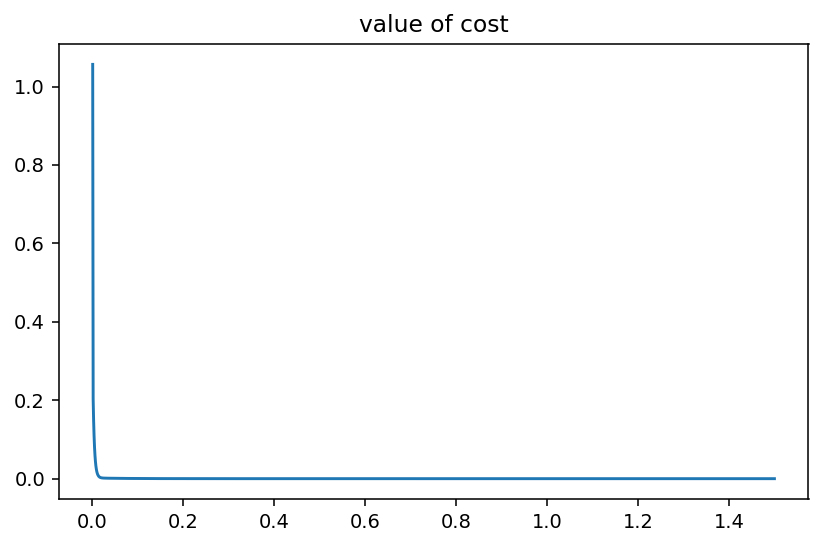

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(1, dpi=140)

# # 数据散点图
# plt.subplot(211)
# plt.title("linear regression")
# #plt.scatter([i[1] for i in x], y)

# # 拟合曲线
# #plt.plot(line[0], line[1], color='red')
# #plt.tight_layout()

# # 代价函数变化图

# plt.subplot(212)
plt.plot(cost[0], cost[1])
plt.title("value of cost")
plt.tight_layout()

plt.show()


In [32]:
for i in range(100):
    print(cost[1][i])

[2064.28215608]
[523.95402751]
[161.80523006]
[76.61437951]
[56.56294556]
[51.8405804]
[50.72769357]
[50.46524998]
[50.40331568]
[50.38868872]
[50.38523154]
[50.38441373]
[50.3842201]
[50.38417421]


IndexError: list index out of range